# Linear Regression

Bài tập này sử dụng thư viện Numpy.

Chúng ta cũng sẽ sử dụng thư viện __scikit-learn__ để kiểm tra kết quả

In [3]:
# import các thư viện 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set_style("whitegrid")

## 1. Linear Regression đơn biến

### 1.1 Trực quan hóa dữ liệu 

Chúng ta sẽ đọc vào file dữ liệu trong thư mục data và lưu các giá trị theo dạng vector vào 2 vector x và y

In [4]:
path = 'data/ex1data1.txt' # đường dẫn tới file dữ liệu

# đọc dữ liệu vào 2 vector x, y
x, y = np.loadtxt(path, delimiter=',', usecols=(0, 1), unpack=True)

In [5]:
# xem 5 dữ liệu đầu của mỗi vector
print(x[:5])
print(y[:5])

[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


Ta sẽ thêm cột 1 vào vector x để sử dụng thuật toán Gradient Descent

In [6]:
X = np.ones((len(x), 2))
X[:, 1] = x

Và từ bây giờ ta sẽ sử dụng ma trận X làm dữ liệu đầu vào

In [7]:
# Kiểm tra xem X đã có cột 1 chưa
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

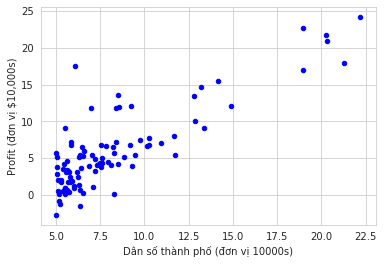

In [8]:
# Trực quan hóa dữ liệu training
plt.scatter(X[:,1], y, marker='o', c='b', s=20)
plt.xlabel("Dân số thành phố (đơn vị 10000s)")
plt.ylabel("Profit (đơn vị $10,000s)");

Sử dụng thư viện __scikit-learn__ thực hiện thuật toán Linear Regression

Model intercept:  -3.89578087831185
Model slope:  1.1930336441895935


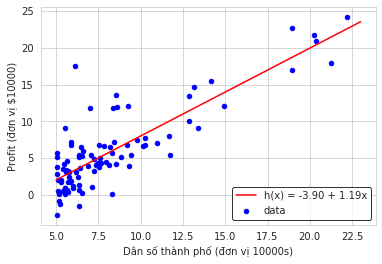

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:,1][:, np.newaxis], y)

xfit = np.linspace(5, 23, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X[:, 1], y, marker='o', c='b', s=20, label='data')
plt.plot(xfit, yfit, c='r', label='h(x) = %0.2f + %0.2fx'%(model.intercept_, model.coef_[0]))
plt.xlabel('Dân số thành phố (đơn vị 10000s)')
plt.ylabel('Profit (đơn vị $10000)')
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k')
print('Model intercept: ', model.intercept_)
print('Model slope: ', model.coef_[0])

## 1.2 Gradient Descent

### Khởi tạo các giá trị

In [10]:
# khởi tạo số lần cập nhật tham số trong gradient-descent
iterations = 1500

# khởi tạo learning rate
alpha = 0.01

# khởi tạo các tham số cần học bằng 0
theta = np.zeros(2)
theta

array([0., 0.])

### Tính cost function J

In [11]:
def computeCost(X, y, theta):
    m = len(y)
    return np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)

Với giá trị khởi tạo các tham số bằng 0 ta sẽ có giá trị của cost function vào khoảng 32.07 như sau:

In [12]:
computeCost(X, y, theta)

32.07273387745567

### Thuật toán Gradient Descent

In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]
        cost[i] = computeCost(X, y, thetaMod)
    
    return thetaMod, thetaHist, cost

Tính intercept và slope bằng thuật toán trên

In [14]:
weights, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)
intercept = weights[0]
slope = weights[1]
print('GD slope: {0}'.format(slope))
print('GD intercept: {0}'.format(intercept))

GD slope: 1.166362350335582
GD intercept: -3.63029143940436


So sánh với intercept và slopt tính được dùng thư viện scikit-learn

In [15]:
print('Scikit-learn slope: {0}'.format(model.coef_[0]))
print('Scikit-learn intercept: {0}'.format(model.intercept_))

Scikit-learn slope: 1.1930336441895935
Scikit-learn intercept: -3.89578087831185


### Trực quan hóa giá trị cost sau mỗi lần cập nhật tham số của thuật toán Gradient Descent

Text(0, 0.5, 'Cost function - $J(\\theta)$')

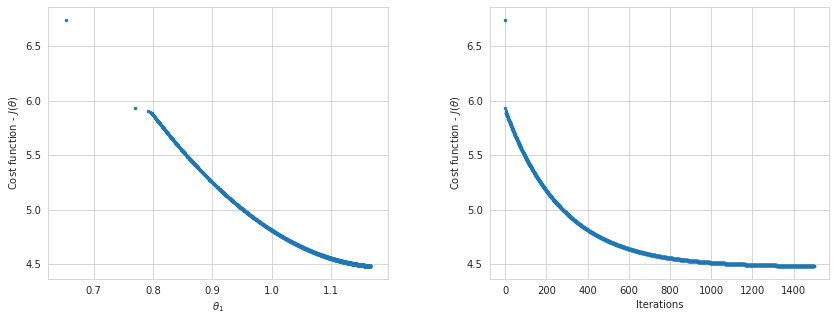

In [16]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Biểu diễn giá trị cost theo giá trị của tham số
ax1.scatter(thetaHist, cost, marker='o', s=6)
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'Cost function - $J(\theta)$')

# Biểu diễn giá trị cost theo số lần cập nhật tham số
ax2.scatter(np.arange(iterations), cost, marker='o', s=6)
ax2.set_xlabel('Iterations')
ax2.set_ylabel(r'Cost function - $J(\theta)$')

Trực quan hóa đường thẳng linear regression tìm được bằng Gradient Descent

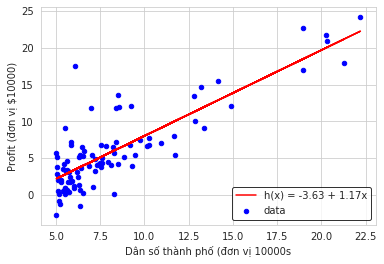

In [17]:
def linearFit(value):
    return weights[0] + weights[1] * value

plt.scatter(X[:, 1], y, marker='o', c='b', s=20, label='data')
plt.plot(X[:, 1], linearFit(X[:, 1]), c='r', label='h(x) = %0.2f + %0.2fx'%(weights[0], weights[1]))
plt.xlabel('Dân số thành phố (đơn vị 10000s')
plt.ylabel('Profit (đơn vị $10000)')
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k')

Dự đoán profit với thành phố có dân số 35000 và thành phố có dân số 70000:

In [18]:
print('Profit for pop. 35000: %0.2f'%(weights.dot([1, 3.5]) * 10000))
print('Profit for pop. 70000: %0.2f'%(weights.dot([1, 7.0]) * 10000))

Profit for pop. 35000: 4519.77
Profit for pop. 70000: 45342.45


### 1.3 Trực quan hóa cost function J(θ)

In [19]:
# Grid to calculate cost values
theta0_vals = np.linspace(-10, 10, 80)
theta1_vals = np.linspace(-1, 4, 80)

# initialize J_vals to a matrix of 0's:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals:
for i in np.arange(theta0_vals.size):
    for j in np.arange(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)

Sử dụng mảng 2 chiều để thực hiện surface plot và contour plot với cost

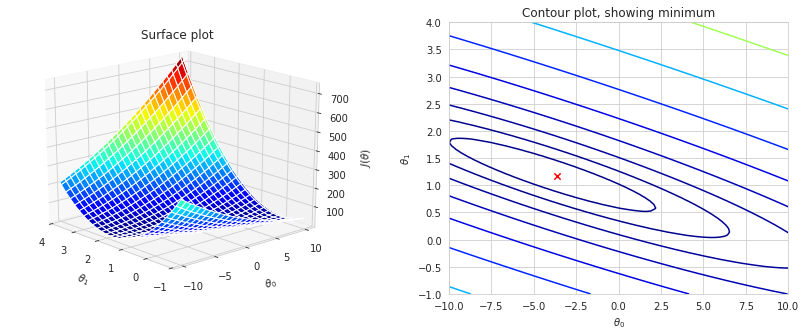

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot:
ax1.set_title('Surface plot')
ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=20, azim=318)
ax1.set_xlabel(r'$\theta_1$', labelpad=8)
ax1.set_xlim(4,-1)
ax1.set_ylabel(r'$\theta_0$', labelpad=8)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8);

# Contour plot:
ax2.set_title('Contour plot, showing minimum')
ax2.contour(theta0, theta1, J_vals.T, np.logspace(-2, 3, 20),  cmap='jet')
ax2.scatter(weights[0], weights[1], marker='x', color='r', s=40)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_yticks(np.arange(-1,4.5,0.5));

## 2. Linear Regression đa biến

Về cơ bản các bước thực hiện thuật toán Gradient Descent với dữ liệu training có nhiều thuộc tính vẫn tương tự như với trường hợp có 1 thuộc tính

In [21]:
# đọc dữ liệu từ file ex1data2.txt 
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
x, y = data[:, :2], data[:, 2]

In [22]:
# xem trước 5 dữ liệu đầu tiên
print(x[:5])
print(y[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
[399900. 329900. 369000. 232000. 539900.]


### 2.1 Chuẩn hóa dữ liệu 

Trực quan hóa dữ liệu xem ta có cần chuẩn hóa dữ liệu không:

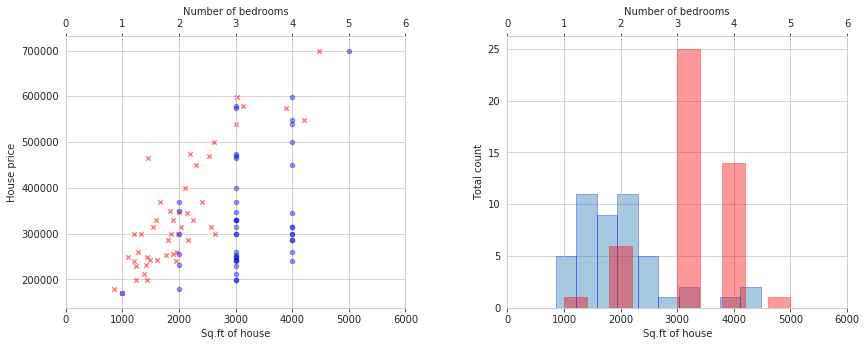

In [23]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

Hàm chuẩn hóa thuộc tính

In [24]:
def featureNormalize(X):
    # mean và std
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu) / sigma
    return X_norm, mu, sigma

Chuẩn hóa dữ liệu training

In [25]:
print(x[:5])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [26]:
X, mean, sigma = featureNormalize(x)

In [27]:
print(X[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


Trực quan hóa dữ liệu training đã được chuẩn hóa

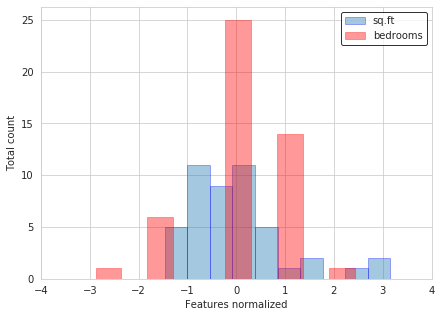

In [28]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

### 2.2 Gradient Descent

Như ở phần đơn biến, ta sẽ thêm vector cột 1 vào X

In [29]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


Định nghĩa hàm Gradient Descent 

In [1]:
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]
        cost[i] = computeCost(X, y, thetaMod)
    
    return thetaMod, thetaHist, cost

Áp dụng gradient descent cho training data

In [33]:
theta = np.zeros(3)
iterations = 10000
alpha = 0.001

In [34]:
weights, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)
print('w[0]: {}\nw[1]: {}\nw[2]: {}'.format(weights[0], weights[1], weights[2]))

w[0]: 340397.28199562227
w[1]: 108736.4644347848
w[2]: -5867.039885830007


### 2.3 So sánh kết quả với Scikit-learn

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
model = reg.fit(x, y)

print('w[0]: {}\nw[1]: {}\nw[2]: {}'.format(model.intercept_, model.coef_[0], model.coef_[1]))

w[0]: 89597.90954279748
w[1]: 139.21067401762554
w[2]: -8738.019112327831


### 2.4 Tùy chọn learning rate cho Gradient Descent

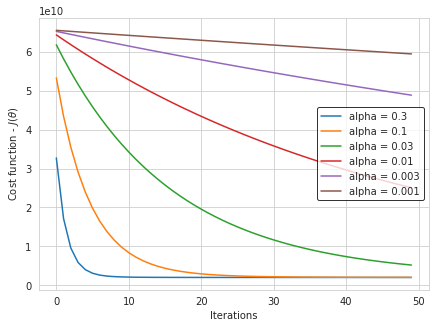

In [36]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 50) 
    
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

Ta nhận thấy learning rate phù hợp nhất ở đây là __0.03__

## 3. Normal Equation

#### Như ở phần lý thuyết đã giới thiệu, ngoài thuật toán Gradient Descent thì với bài toán Linear Regression chúng ta còn có thể áp dụng Normal Equation.

Điểm mạnh của Normal Equation so với Gradient Descent đó là:

1. Không cần vòng lặp mà vẫn tính được giá trị gần như tối ưu cho các tham số

2. Không cần khởi tạo và lựa chọn learning rate 

3. Rất phù hợp với bài toán có lượng dữ liệu không quá lớn vì cần phải tính ma trận nghịch đảo. Khi lượng dữ liệu lớn thì đây lại chính là điểm yếu của Normal Equation

In [39]:
from numpy.linalg import inv

# hàm normal equation
def normalEqn(X, y):
    invert = inv(np.dot(X.T, X))
    return np.dot(invert, np.dot(X.T, y))

In [42]:
# Với Normal Equation ta cũng cần thêm vector cột 1 vào ma trận x
X = np.ones((len(x), 3))
X[:, 1:] = x

In [43]:
weights = normalEqn(X, y)
print('w[0]: {}\nw[1]: {}\nw[2]: {}'.format(weights[0], weights[1], weights[2]))

w[0]: 89597.90954279527
w[1]: 139.21067401762548
w[2]: -8738.019112328067


Ta có thể thấy kết quả khi áp dụng Normal Equation rất gần với kết quả khi sử dụng thư viện scikit-learn